In [33]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as PLT
import seaborn as sns
import warnings as War

War.filterwarnings(action='ignore')



In [34]:
# Adding the Raw dataset given

df = pd.read_csv(r'D:\Microsoft VS Code\Data Analysis Using Python\Dataset Folder\hotel_bookings 2.csv', encoding= 'unicode_escape')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [35]:
# Defining the shape of the given dataset

print('The shape of the given dataset is shown as follows: ', df.shape)

The shape of the given dataset is shown as follows:  (119390, 32)


In [36]:
# Seggregating numerical and categorical columns

num_cols = []
cat_cols = []

for cols in df.columns:

    if(df[cols].dtype == 'O'):
        cat_cols.append(cols)
    else:
        num_cols.append(cols)

print('The numerical columns of the given dataset are as follows: \n\n', num_cols)
print('\n\n The Categorical columns of the given dataset are as follows: \n\n', cat_cols)

The numerical columns of the given dataset are as follows: 

 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


 The Categorical columns of the given dataset are as follows: 

 ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [37]:
# Column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
# Changing the data type of reservation_status_date to datetime

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],format='mixed')

print('After changing the data type of the given column is given by:')


After changing the data type of the given column is given by:


In [39]:
# Checking unique values in categorical columns

df.describe(include='object')

print('the unique values in each categorical columns are shown below: ')

for cols in df.describe(include='object').columns:
    print(cols)
    print(df[cols].unique())
    print('-'*100)


the unique values in each categorical columns are shown below: 
hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' '

In [40]:
# Checking for columns with higher null values 

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [41]:
# Dropping the columns with higher null values

df.drop(['company','agent'], axis=1, inplace=True)

In [42]:
# After drpping columns with higher null values the shape of the dataset is given by

print('The new shape is given by: ', df.shape) 

The new shape is given by:  (119390, 30)


In [43]:
# Removing the rest of the nulll values

df_1 = df.dropna()
print('After cleaning the dataset we get: ')

df_1.isnull().sum()

After cleaning the dataset we get: 


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Hence the EDA process is completed. Moving on to analysis part.

In [44]:
# Showing cancelation percentage 

Cancelation_prt = df['is_canceled'].value_counts(normalize=True)*100
print('Hence the cancelation rate in percentage is shown by: ')

Cancelation_prt

Hence the cancelation rate in percentage is shown by: 


is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64

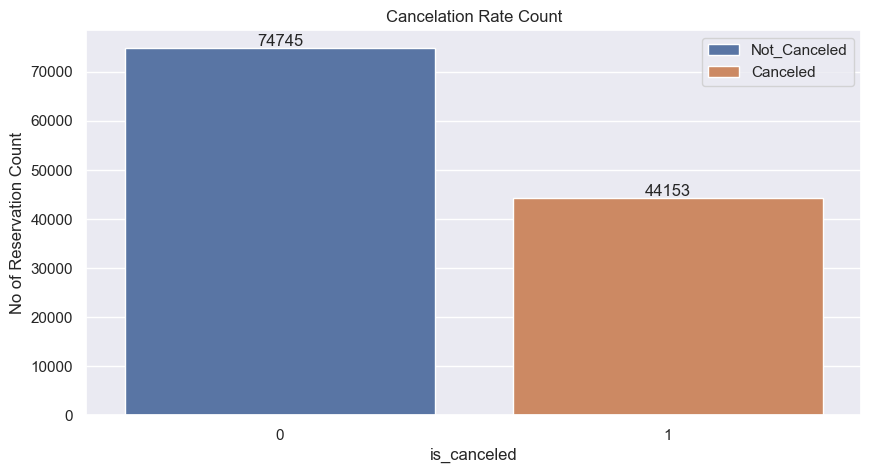

In [45]:
# Plotting the above set of info in a plot

plt = sns.countplot(x = 'is_canceled', data=df_1, hue='is_canceled')
PLT.legend(['Not_Canceled','Canceled'])
PLT.ylabel('No of Reservation Count')
PLT.title('Cancelation Rate Count')

for bars in plt.containers:
    plt.bar_label(bars)

In [46]:
# Cancelation rate hotel wise 

Resort_Hotels = df_1[df_1['hotel'] == 'Resort Hotel']
City_Hotels = df_1[df_1['hotel'] == 'City Hotel']

print('For Resort_Hotels the cancelation rate: \n\n', Resort_Hotels['is_canceled'].value_counts(normalize=True)*100)
print('\n]n For City_Hotels the canacelation rate: \n\n', City_Hotels['is_canceled'].value_counts(normalize=True)*100)

For Resort_Hotels the cancelation rate: 

 is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

]n For City_Hotels the canacelation rate: 

 is_canceled
0    58.29109
1    41.70891
Name: proportion, dtype: float64


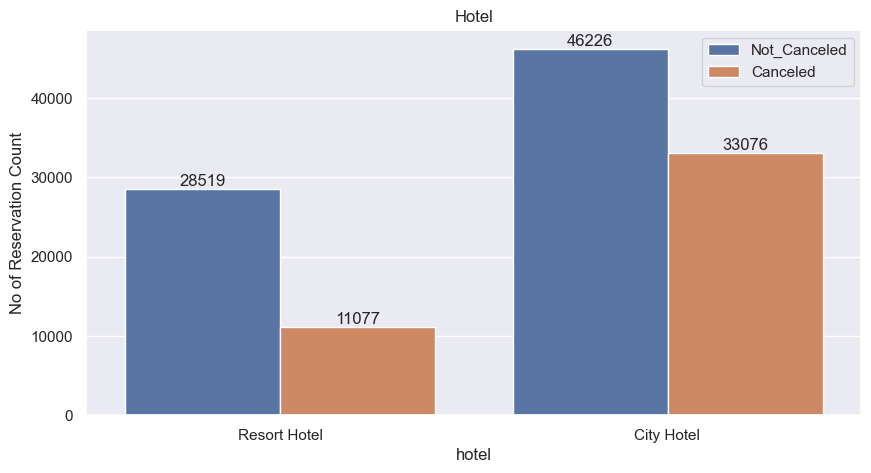

In [47]:
# Cancelation Rate plot for both the hotels 

plt_1 = sns.countplot(x = 'hotel', data=df_1, hue='is_canceled')

PLT.legend(['Not_Canceled','Canceled'])
PLT.ylabel('No of Reservation Count')
PLT.title('Hotel')

for bars in plt_1.containers:
    plt_1.bar_label(bars)

Hence City_Hotels has a higher cancelation rate as compared to Resort_Hotels.

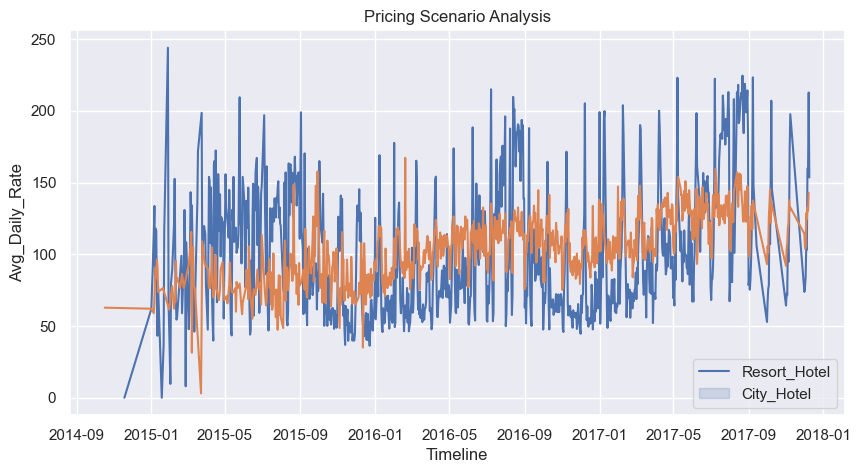

In [48]:
# Showcasing the pricing scenario by reservation_status_date wise

Resort_Hotels_Price = Resort_Hotels.groupby(['reservation_status_date'], as_index=False)['adr'].mean()
City_Hotels_Price = City_Hotels.groupby(['reservation_status_date'], as_index=False)['adr'].mean()

plt_2 = sns.lineplot(x= 'reservation_status_date', y= 'adr', data=Resort_Hotels_Price)
plt_3 = sns.lineplot(x= 'reservation_status_date', y= 'adr', data=City_Hotels_Price)
sns.set(rc={'figure.figsize':(25,5)})

PLT.ylabel('Avg_Daily_Rate')
PLT.xlabel('Timeline')
PLT.title('Pricing Scenario Analysis')
PLT.legend(['Resort_Hotel','City_Hotel'])


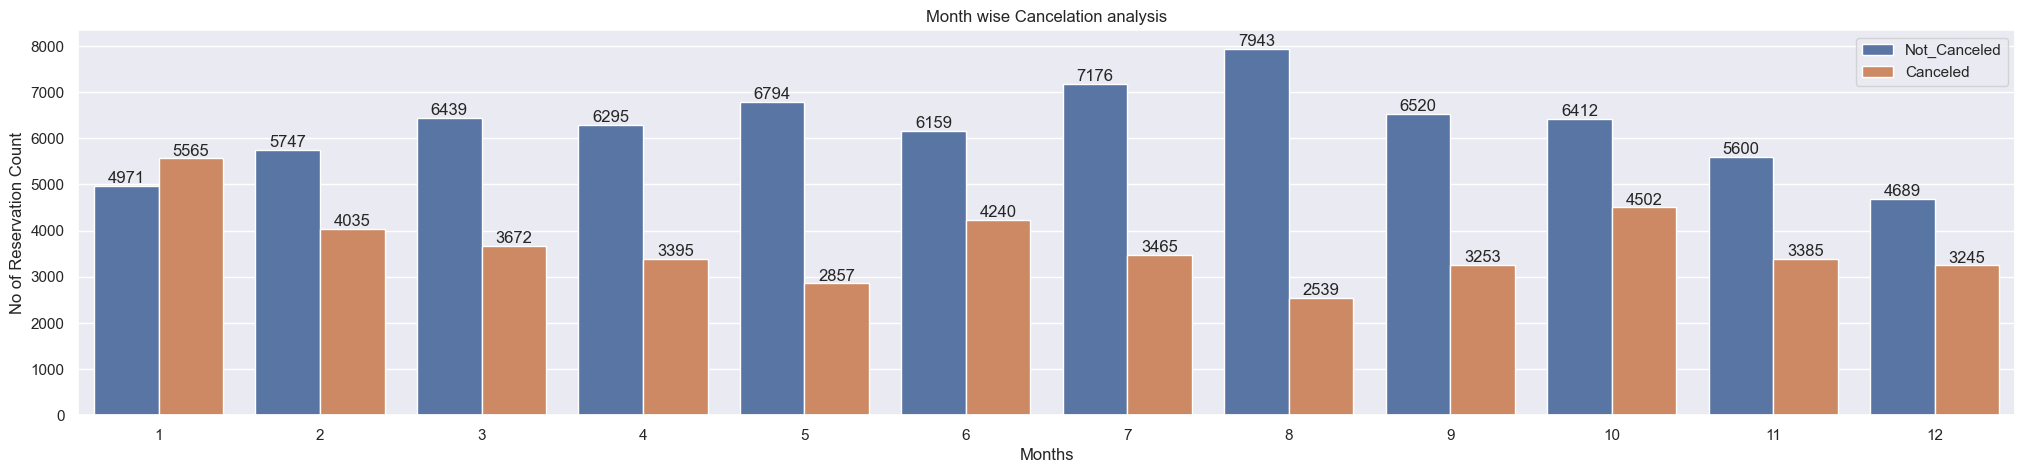

In [49]:
# Month wise analysis of cancelation rate

df_1['Month'] = df_1['reservation_status_date'].dt.month #(Creating a New Column in the dataset)

plt_4 = sns.countplot(x = 'Month', data=df_1, hue='is_canceled')
sns.set(rc={'figure.figsize': (7,5)})

PLT.legend(['Not_Canceled','Canceled'])
PLT.title('Month wise Cancelation analysis')
PLT.ylabel('No of Reservation Count')
PLT.xlabel('Months')

for bars in plt_4.containers:
    plt_4.bar_label(bars)

Hence in the month of January there is a rise in cancelation rate. 

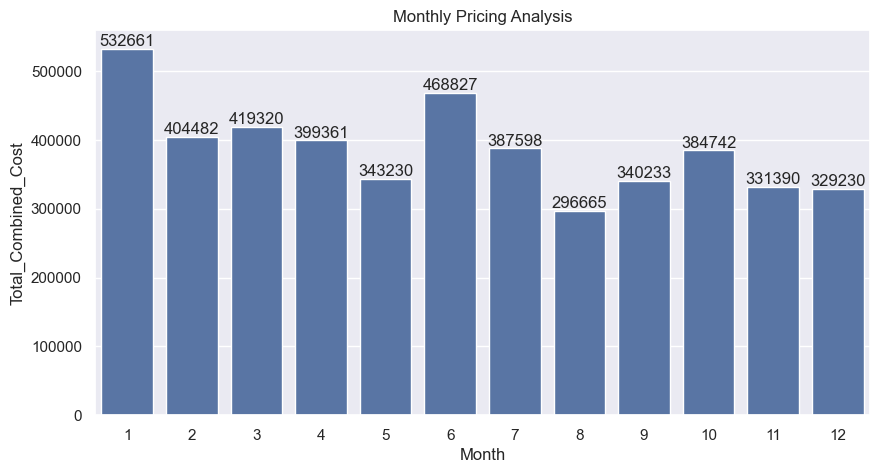

In [55]:
# Pricing scenario depending upon monthly basis

Truly_Canceled = df_1[df_1['is_canceled'] == 1]
Avg_Month_Exp = Truly_Canceled.groupby(['Month'], as_index=False)['adr'].sum().reset_index()

# Showing it in a plot format

plt_5 = sns.barplot(x = 'Month', y = 'adr', data=Avg_Month_Exp)
sns.set(rc={'figure.figsize':(15,5)})

PLT.title('Monthly Pricing Analysis')
PLT.ylabel('Total_Combined_Cost')
PLT.xlabel('Month')

for bars in plt_5.containers:
    plt_5.bar_label(bars) 

Thus we have proved that due to Higher Monthly charges the cancelation rate are way high in the month of January and lowest in the month of August thus leading to maximum booking in that month.

Text(0.5, 1.0, 'Top 8 countries with maximum cancelation rate')

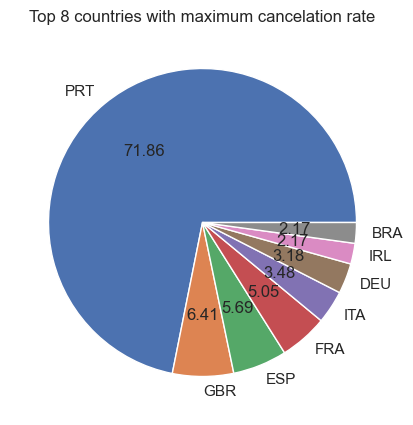

In [51]:
# Top 8 countries with the maximum cancelation

Top_8_Countries = Truly_Canceled['country'].value_counts()[:8]
plt_6 = PLT.pie(Top_8_Countries, autopct='%.2f', labels= Top_8_Countries.index)

PLT.title('Top 8 countries with maximum cancelation rate')

Thus From the above Pie chart we got a clear idea that country wise Portugal is facing maximum cancelation. 

Now it was given that the market segment which had the maximum cancelation is the Offline Travel Agent. But it needs to be verified. So let's verify it via normal anlysis and pie plot. 

In [58]:
# Cancelation analysis due to market_segment

Market_Segment = Truly_Canceled['market_segment'].value_counts(normalize=True)*100

print('The final result after the analysis is given by: ')
Market_Segment

The final result after the analysis is given by: 


market_segment
Online TA        46.968496
Groups           27.397912
Offline TA/TO    18.748443
Direct            4.348515
Corporate         2.215025
Complementary     0.203837
Aviation          0.117772
Name: proportion, dtype: float64

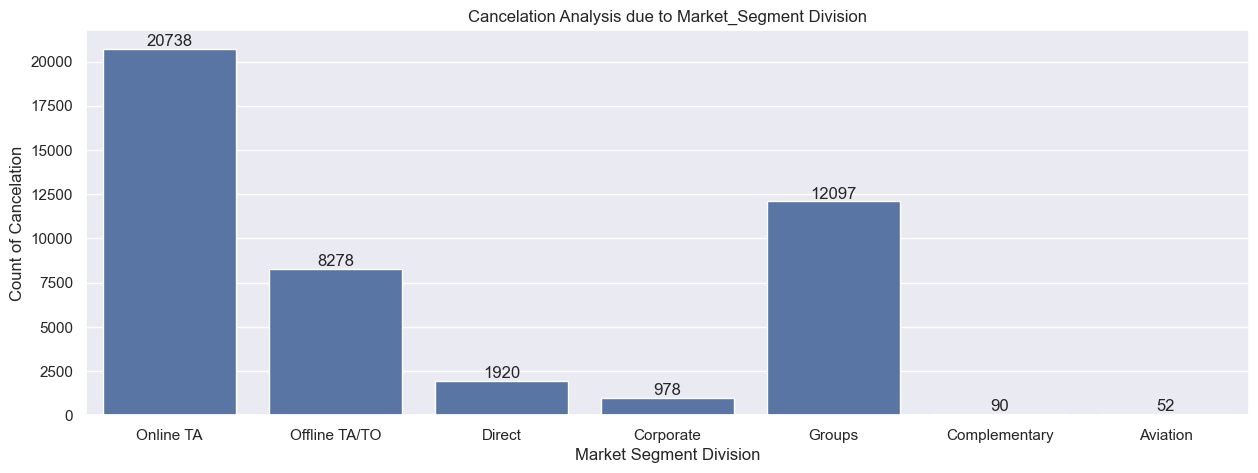

In [62]:
# Plotting the above set of info in a countplot we get:

plt_7 = sns.countplot(x = 'market_segment', data=Truly_Canceled)
PLT.ylabel('Count of Cancelation')
PLT.xlabel('Market Segment Division')
PLT.title('Cancelation Analysis due to Market_Segment Division')

for bars in plt_7.containers:
    plt_7.bar_label(bars)



Hence from normal analysis via code and plot we got to know it is Online Travel Agents with the cancelation rate count rather than offline travel agents.    